<a href="https://colab.research.google.com/github/intimanjunath/DeepLearning-Performance-Analytics/blob/main/Classification_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
#Imports and WandB Initialization

In [21]:
!pip install --upgrade wandb

In [22]:
# Cell 1: Imports and WandB Initialization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import (classification_report, roc_curve, precision_recall_curve,
                             auc, accuracy_score)
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
import wandb
from wandb.integration.keras import WandbCallback


# Initialize wandb (make sure to run wandb.login() in a separate cell if not already logged in)
wandb.init(project="dl_classification_project", config={
    "epochs": 50,
    "batch_size": 32,
    "optimizer": "adam",
    "loss": "binary_crossentropy"
})

In [23]:
# Cell 2: Load the Breast Cancer Dataset and split it into training and testing sets
data = load_breast_cancer()
X = data.data
y = data.target

# Split the dataset: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Cell 3: Build the neural network model (a simple MLP for binary classification)
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()  # Display the model architecture

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,097 (16.00 KB)

 Trainable params: 4,097 (16.00 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
# Cell 4: Train the model using a validation split and log metrics with wandb
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=wandb.config.epochs,
    batch_size=wandb.config.batch_size,
    callbacks=[WandbCallback(save_model=False, save_graph=False)],  # Disable model saving and graph logging to avoid the error
    verbose=1
)

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 47s 25ms/step - accuracy: 0.4572 - loss: 21.6441 - val_accuracy: 0.7912 - val_loss: 1.3690
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5109 - loss: 20.6092 - val_accuracy: 0.3626 - val_loss: 5.0596
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4905 - loss: 14.3217 - val_accuracy: 0.6484 - val_loss: 7.0623
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5880 - loss: 11.8292 - val_accuracy: 0.7582 - val_loss: 2.2993
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5738 - loss: 7.0970 - val_accuracy: 0.7802 - val_loss: 2.4071
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6561 - loss: 5.7259 - val_accuracy: 0.8242 - val_loss: 2.4312
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6202 - loss: 5.1832 - val_accuracy: 0.8681 - val_loss: 1.8630
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7336 - loss: 3.7779 - val_accuracy: 0.7582 - val

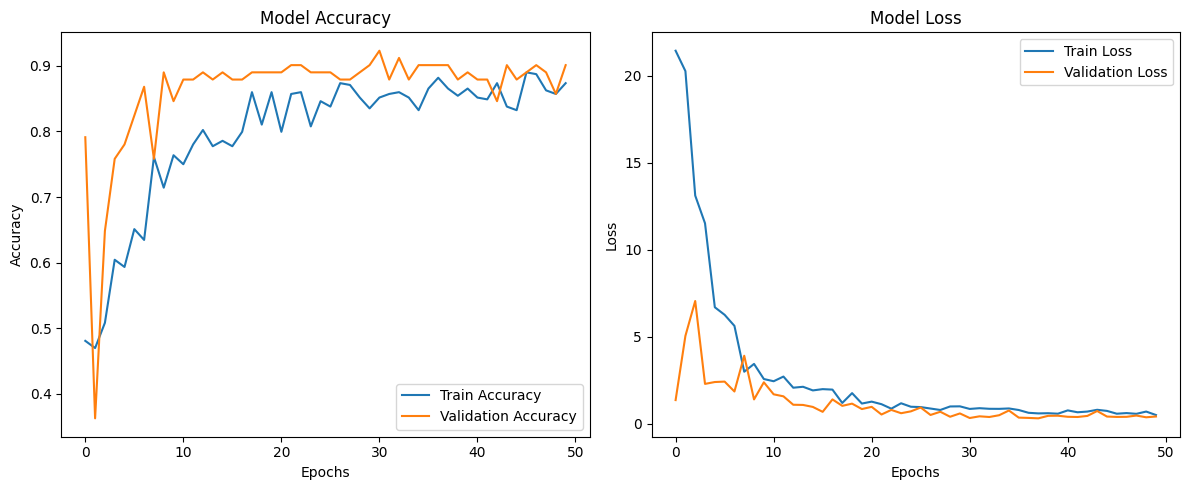

In [31]:
# Cell 5: Plot the training history (accuracy and loss over epochs)
plt.figure(figsize=(12, 5))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

plt.tight_layout()
plt.show()

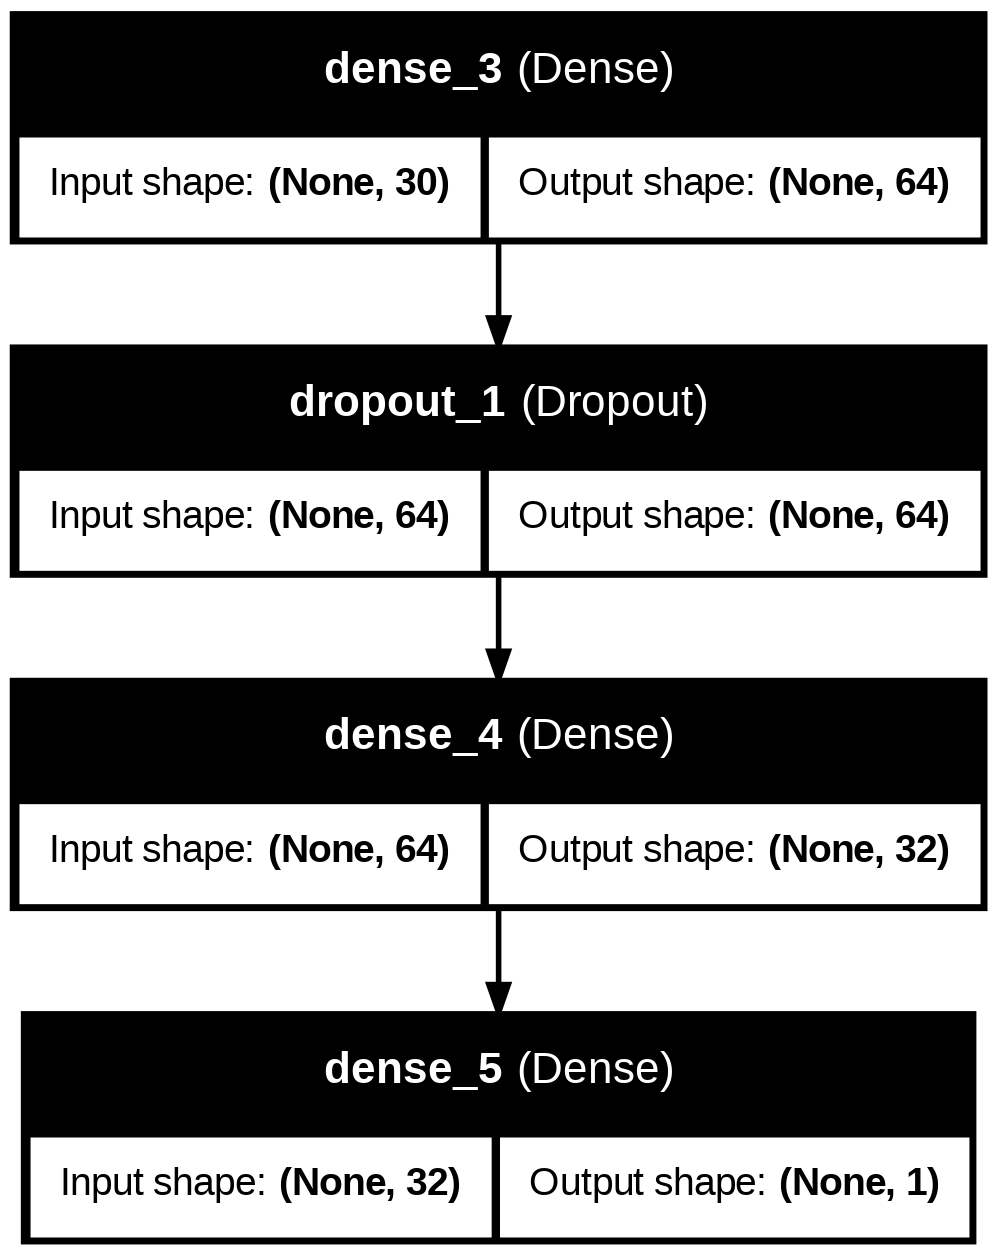


Model Summary:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,293 (48.02 KB)

 Trainable params: 4,097 (16.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,196 (32.02 KB)

In [32]:
# Cell 6: Visualize the model architecture
from tensorflow.keras.utils import plot_model
from IPython.display import Image, display

# Save the model architecture to a file
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

# Display the model architecture image in Colab
display(Image('model_architecture.png'))

# Optionally, print the model summary for additional details
print("\nModel Summary:")
model.summary()

In [33]:
# Cell 7: Evaluate the model on the test set
y_pred_prob = model.predict(X_test).ravel()  # Get predicted probabilities
y_pred = (y_pred_prob > 0.5).astype(int)       # Convert probabilities to binary predictions

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [34]:
# Cell 8: Calculate overall accuracy and generate a classification report
overall_accuracy = accuracy_score(y_test, y_pred)
print("Overall Accuracy:", overall_accuracy)
wandb.log({"Overall Accuracy": overall_accuracy})

# Generate and print the classification report (includes precision, recall, F1-score per class)
report = classification_report(y_test, y_pred, output_dict=True)
print("Classification Report:")
print(classification_report(y_test, y_pred))
wandb.log({"Classification Report": report})

Overall Accuracy: 0.9385964912280702
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.84      0.91        43
           1       0.91      1.00      0.95        71

    accuracy                           0.94       114
   macro avg       0.96      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114



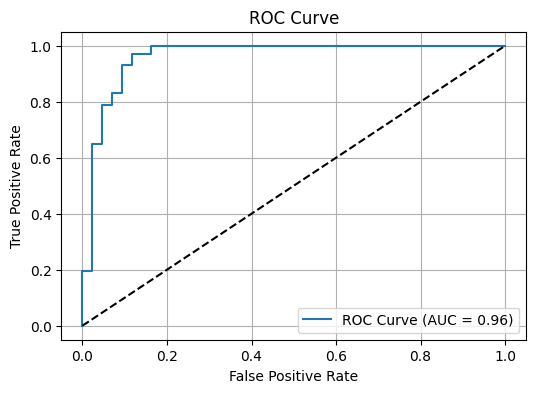

In [35]:
# Cell 9: Plot the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

wandb.log({"ROC AUC": roc_auc})

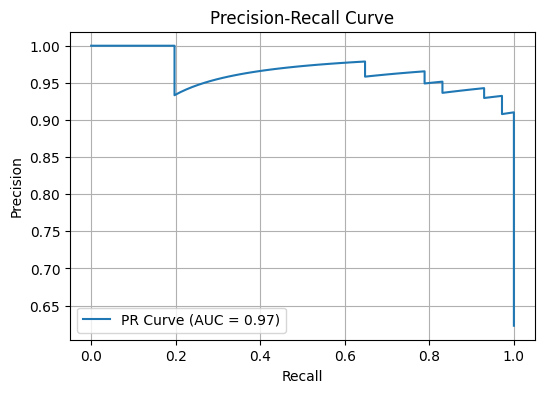

In [36]:
# Cell 10: Plot the Precision-Recall Curve
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_prob)
pr_auc = auc(recall, precision)

plt.figure(figsize=(6, 4))
plt.plot(recall, precision, label=f'PR Curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.grid(True)
plt.show()

wandb.log({"PR AUC": pr_auc})

In [37]:
# Cell 11: Per Class Error Analysis - Display misclassified examples for each class

# For binary classification, we have two classes: 0 and 1.
classes = np.unique(y_test)

for cls in classes:
    idx = np.where(y_test == cls)[0]         # Indices for the current class
    misclassified = idx[y_pred[idx] != cls]    # Misclassified indices for the class

    if len(misclassified) > 0:
        print(f"\nClass {cls} Misclassified Examples (up to 3 shown):")
        for i in misclassified[:3]:
            print(f"Index {i}:")
            print(f"  Features      : {X_test[i]}")
            print(f"  True Label    : {y_test[i]}")
            print(f"  Predicted     : {y_pred[i]}")
            print(f"  Predicted Prob: {y_pred_prob[i]:.3f}")
    else:
        print(f"\nClass {cls}: No misclassified examples found.")


Class 0 Misclassified Examples (up to 3 shown):
Index 13:
  Features      : [1.626e+01 2.188e+01 1.075e+02 8.268e+02 1.165e-01 1.283e-01 1.799e-01
 7.981e-02 1.869e-01 6.532e-02 5.706e-01 1.457e+00 2.961e+00 5.772e+01
 1.056e-02 3.756e-02 5.839e-02 1.186e-02 4.022e-02 6.187e-03 1.773e+01
 2.521e+01 1.137e+02 9.752e+02 1.426e-01 2.116e-01 3.344e-01 1.047e-01
 2.736e-01 7.953e-02]
  True Label    : 0
  Predicted     : 1
  Predicted Prob: 0.976
Index 15:
  Features      : [1.910e+01 2.629e+01 1.291e+02 1.132e+03 1.215e-01 1.791e-01 1.937e-01
 1.469e-01 1.634e-01 7.224e-02 5.190e-01 2.910e+00 5.801e+00 6.710e+01
 7.545e-03 6.050e-02 2.134e-02 1.843e-02 3.056e-02 1.039e-02 2.033e+01
 3.272e+01 1.413e+02 1.298e+03 1.392e-01 2.817e-01 2.432e-01 1.841e-01
 2.311e-01 9.203e-02]
  True Label    : 0
  Predicted     : 1
  Predicted Prob: 0.973
Index 58:
  Features      : [1.348e+01 2.082e+01 8.840e+01 5.592e+02 1.016e-01 1.255e-01 1.063e-01
 5.439e-02 1.720e-01 6.419e-02 2.130e-01 5.914e-01 1.545